In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np

## adding metadata

In [5]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 1612073 × 18914
    obs: 'obsnames'
    var: 'varnames'

In [8]:
adata.X.data

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [9]:
meta = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_norm.final_noMB.cell_labels.tsv', sep = '\t')


/tmp/ipykernel_1979791/2162881983.py:1: DtypeWarning: Columns (10,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_norm.final_noMB.cell_labels.tsv', sep = '\t')


In [10]:
obs = pd.merge(adata.obs, meta, how = 'inner', left_on = 'obsnames', right_on = 'barcode')

In [11]:
adata_ann = adata[adata.obs_names.isin(obs.obsnames)]

In [9]:
adata_ann.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/tmp.h5ad')

In [2]:
adata_ann = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/tmp.h5ad')

In [12]:
adata_ann.obs = obs

In [9]:
adata_ann

AnnData object with n_obs × n_vars = 1353075 × 18914
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'barcode', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'
    var: 'varnames'

In [13]:
adata_ann.X.data

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [10]:
adata_ann.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot.h5ad')

## preprocess and check data

In [2]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
adata

AnnData object with n_obs × n_vars = 1353075 × 18914
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'barcode', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'
    var: 'varnames'

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adata.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_celltypes_processed.h5ad')

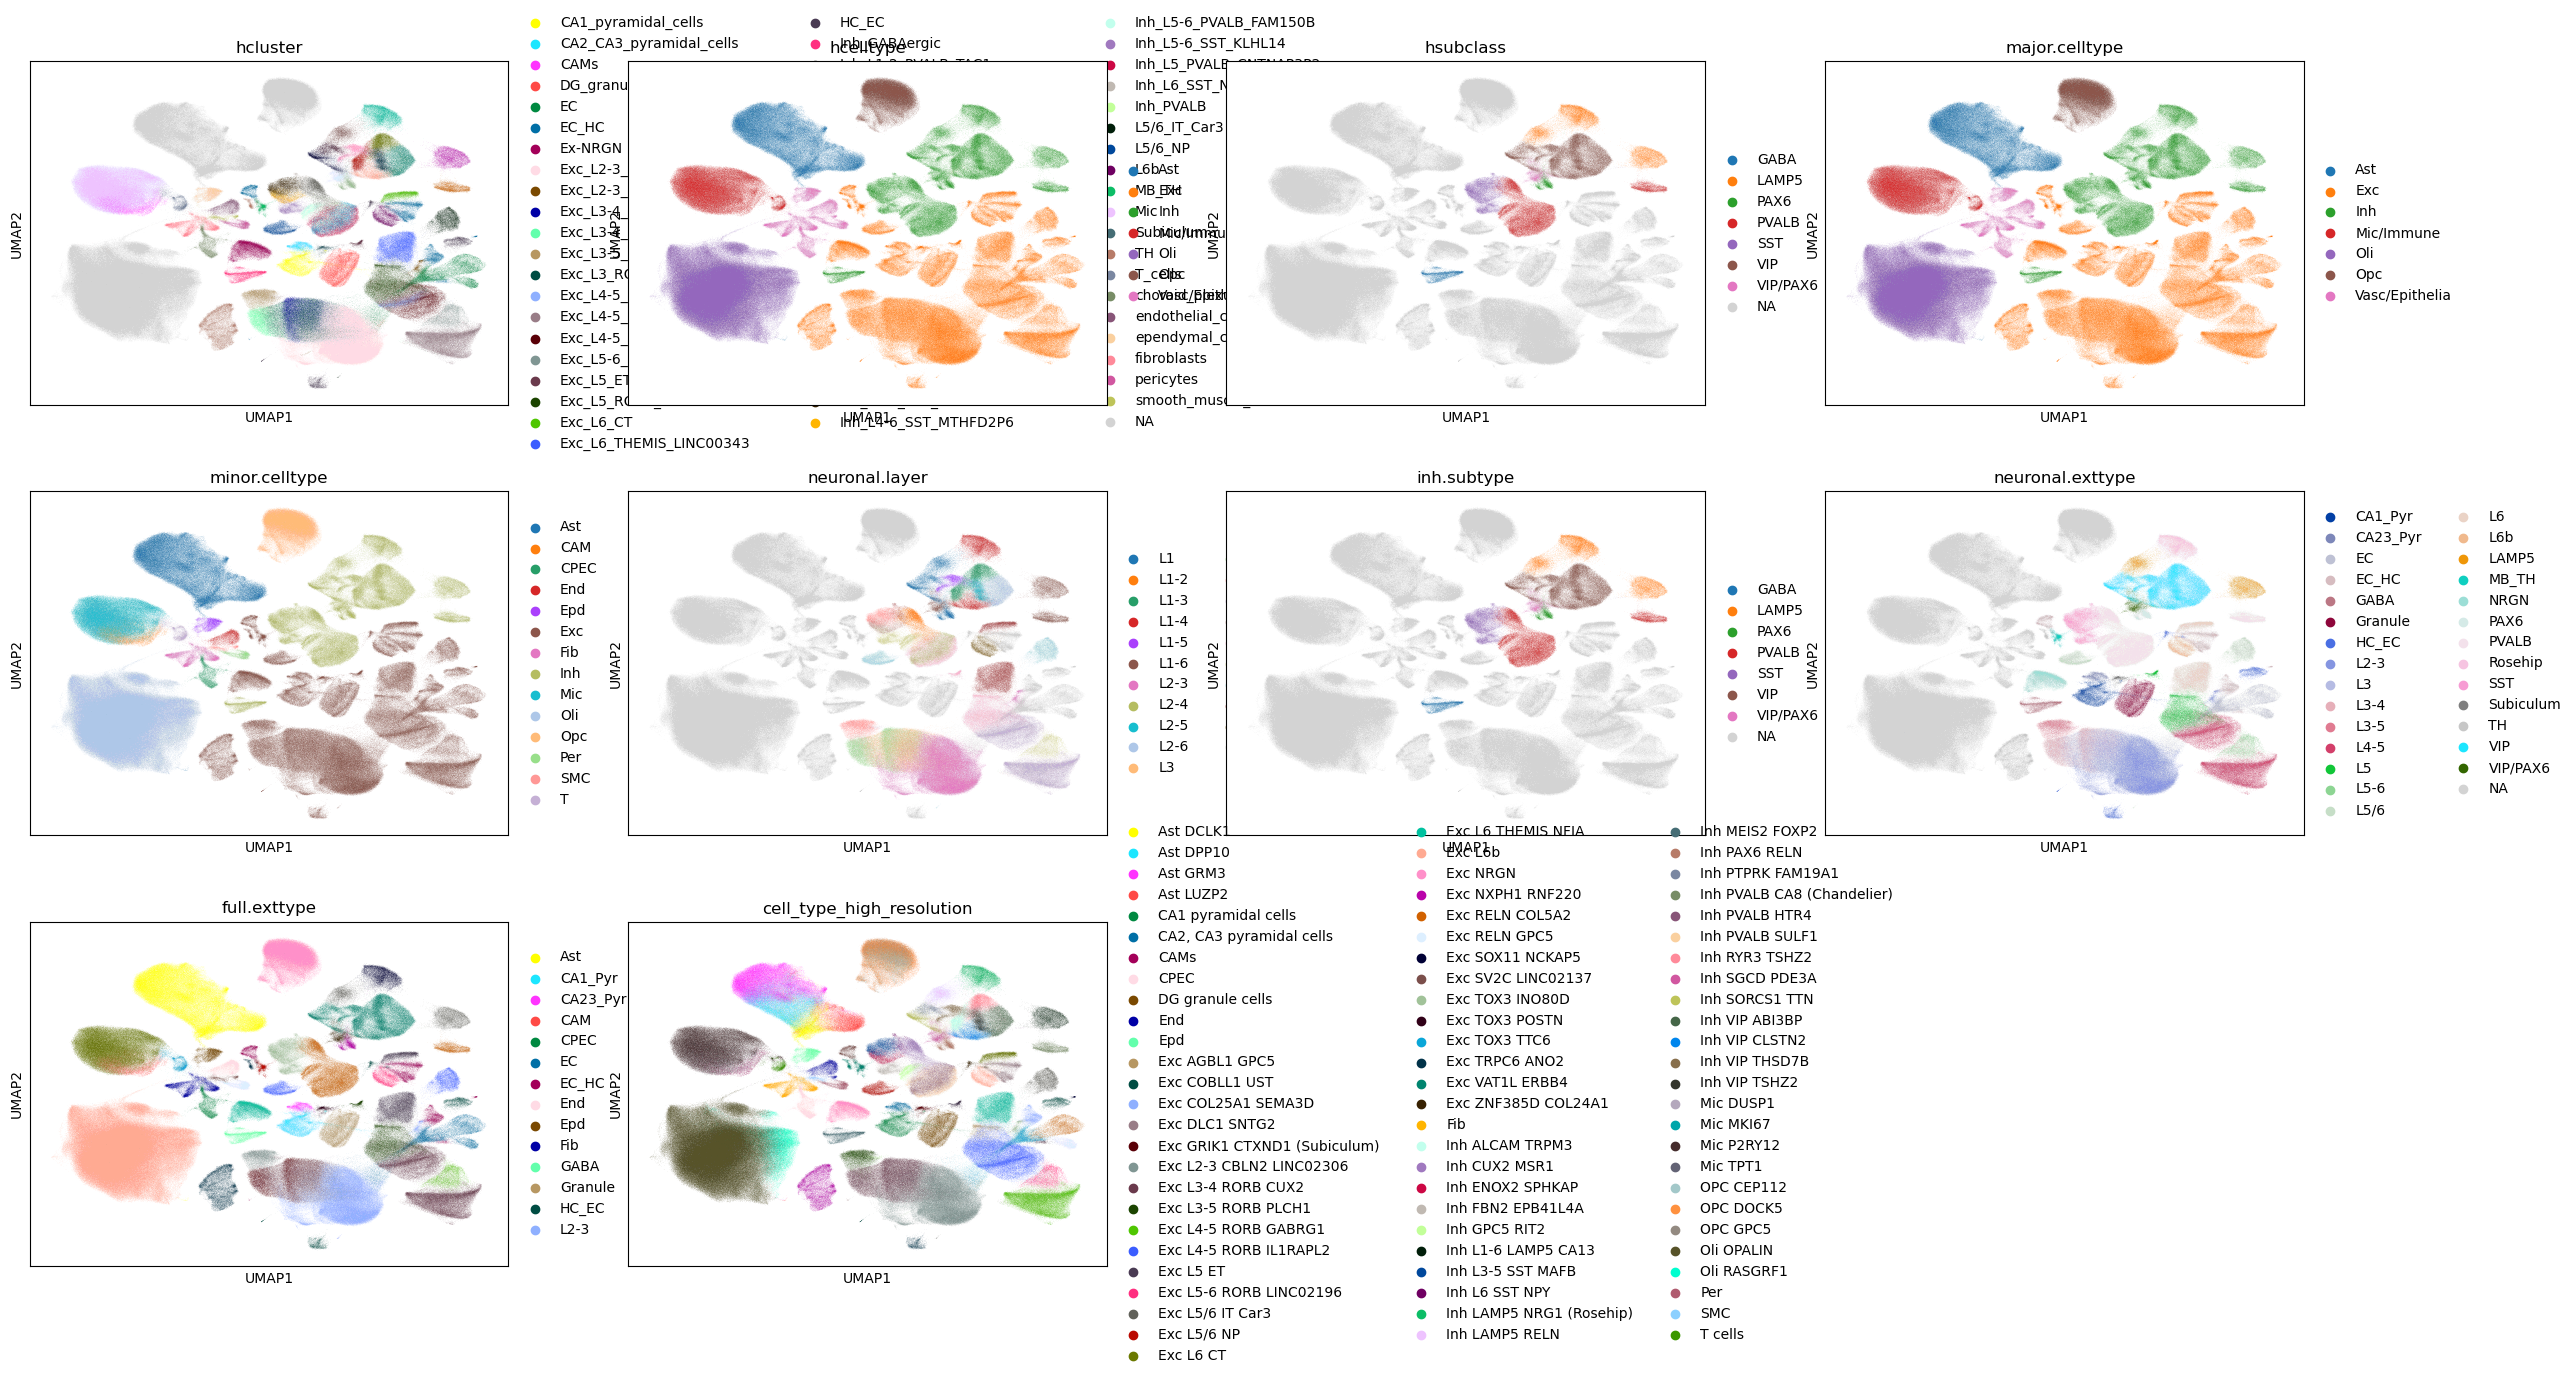

In [6]:
sc.pl.umap(adata, color = ['hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'])

## add patient metadata

In [2]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_celltypes_processed.h5ad')

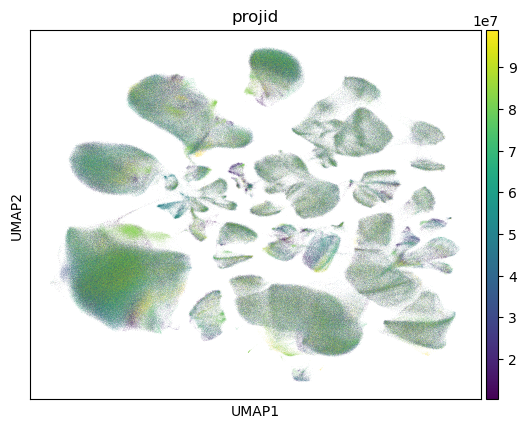

In [37]:
sc.pl.umap(adata, color = ['projid'])

In [16]:
adata.obs.columns

Index(['obsnames', 'lbl', 'U1', 'U2', 'barcode', 'rind', 'region', 'projid',
       'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass',
       'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype',
       'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'],
      dtype='object')

In [40]:
len(adata.obs.projid.unique())

48

In [38]:
clinical_meta = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/ROSMAP_clinical.csv')

In [41]:
len(clinical_meta.projid.unique())

3584

In [21]:
snrnaseq_meta = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_assay_snRNAseq_metadata.csv')

In [26]:
snrnaseq_meta.columns

Index(['specimenID', 'platform', 'libraryPrep', 'libraryPreparationMethod',
       'isStranded', 'readStrandOrigin', 'runType', 'readLength', 'assay',
       'RIN', 'rnaBatch', 'libraryBatch', 'sequencingBatch', 'libraryType',
       'sampleBarcode', 'totalReads', 'validBarcodeReads', 'numberCells',
       'medianGenes', 'medianUMIs', 'libraryID', 'referenceSet',
       'libraryVersion', 'DV200'],
      dtype='object')

In [50]:
len(snrnaseq_meta.specimenID.unique())

6201

In [44]:
len(snrnaseq_meta.ID.unique())

427

In [43]:
snrnaseq_meta['ID'] = snrnaseq_meta['specimenID'].str.split('.').str[0]

In [28]:
ind_meta = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_individual_metadata.csv')

In [36]:
ind_meta.value_counts()

Series([], Name: count, dtype: int64)

In [31]:
len(ind_meta.individualID.unique())

447

In [15]:
pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_biospecimen_metadata.csv')

,individualID,assay,specimenID,specimenIdSource,organ,tissue,sampleStatus,isPostMortem,BrodmannArea,tissueWeight,tissueVolume,nucleicAcidSource,cellType,fastingState,samplingAge,samplingAgeUnits,visitNumber
0,R1042011,snATACSeq,R1042011.183,Rush,brain,prefrontal cortex,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R1042011,snMultiome,R1042011.182,Rush,brain,medial frontal cortex,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R1154454,snATACSeq,R1154454.183,Rush,brain,prefrontal cortex,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R1213305,snATACSeq,R1213305.183,Rush,brain,prefrontal cortex,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R1213305,snATACSeq,R1213305.184,Rush,brain,prefrontal cortex,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,R9738414,scrnaSeq,R9738414_HC,Rush,brain,hippocampus,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,R7737688,scrnaSeq,R7737688_HC,Rush,brain,hippocampus,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6680,R7844746,scrnaSeq,R7844746_HC,Rush,brain,hippocampus,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6681,R6692433,scrnaSeq,R6692433_HC,Rush,brain,hippocampus,frozen,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_assay_multiome_metadata.csv')

,assay,libraryID,sequencingBatch,runType,readLength,platform,libraryPreparationMethod,specimenID,RIN,rnaBatch,...,libraryPrep,libraryType,sampleBarcode,isStranded,readStrandOrigin,totalReads,validBarcodeReads,numberCells,medianGenes,medianUMIs
0,multiome,230211Kel_11,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1042011.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,multiome,230211Kel_3,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1924801.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,multiome,230211Kel_13,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R2645096.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,multiome,230211Kel_17,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R3111222.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,multiome,230211Kel_9,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R4077358.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,multiome,230211Kel_19,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R4581557.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,multiome,230211Kel_4,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R5031238.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,multiome,230211Kel_15,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R6698302.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,multiome,230211Kel_10,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R7208968.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,multiome,230211Kel_6,230211Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R7920516.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_assay_RNAseq_metadata.csv')

,specimenID,platform,libraryPrep,libraryPreparationMethod,isStranded,readStrandOrigin,runType,readLength,assay,RIN,...,sampleBarcode,totalReads,validBarcodeReads,numberCells,medianGenes,medianUMIs,DV200,libraryID,referenceSet,libraryVersion
0,R5965031_AG,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R9810713_AG,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R3067449_AG,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R9210731_AG,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R9286126_AG,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,R5221394_TH,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,R6370138_TH,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,R1617674_TH,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,R1154454_TH,Illumina NovaSeq 6000,polyAselection,10x,True,reverse,pairedEnd,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/MIT_ROSMAP_Multiomics_assay_snATACseq_metadata.csv')

,assay,libraryID,sequencingBatch,runType,readLength,platform,libraryPreparationMethod,specimenID,referenceSet,transposaseBatch,pcrCycles,isStranded,readStrandOrigin,meanCoverage,meanGCContent
0,snATACSeq,D19-13166,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1042011.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,snATACSeq,D19-12701,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1154454.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,snATACSeq,D19-12703,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1213305.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,snATACSeq,D19-13174,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1213305.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,snATACSeq,D19-12524,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R1407047.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,snATACSeq,D19-12520,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R9677385.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,snATACSeq,D19-12532,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R9781891.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,snATACSeq,D19-12514,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R9810713.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,snATACSeq,D19-125458,191203Kel,pairedEnd,50,IlluminaNovaseq6000,10x,R9880904.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## try read multiomics

In [62]:
ad1 = sc.read_10x_h5("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_10.raw_feature_bc_matrix.h5")

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [70]:
ad2 = sc.read_10x_h5("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_2.raw_feature_bc_matrix.h5")

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [71]:
len(set(ad1.obs_names).intersection(set(ad2.obs_names)))

668597

In [76]:
ad1

AnnData object with n_obs × n_vars = 707081 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [77]:
ad2

AnnData object with n_obs × n_vars = 694380 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [60]:
gex_data

AttributeError: 'list' object has no attribute 'var'

In [78]:
# Step 2: Load ATAC fragments and create accessibility matrix
# (Parsing atac_fragments.tsv.gz files)
atac_files = [
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_10.atac_fragments.tsv.gz",
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_1.atac_fragments.tsv.gz",
    # Add other ATAC fragment files as needed
]

# Placeholder: Combine fragments into a DataFrame or sparse matrix
# Assume `load_atac_data` parses fragments and creates a count matrix
def load_atac_data(file):
    # Example: Parse and create a DataFrame (replace with actual implementation)
    return pd.read_csv(file, sep="\t", header=None, names=["chrom", "start", "end", "barcode", "count"])

atac_dfs = [load_atac_data(f) for f in atac_files]
atac_combined = pd.concat(atac_dfs)

In [79]:
atac_combined

,chrom,start,end,barcode,count
0,# id=230211Kel_10,NaN,NaN,NaN,NaN
1,# description=230211Kel_10,NaN,NaN,NaN,NaN
2,#,NaN,NaN,NaN,NaN
3,# pipeline_name=cellranger-arc,NaN,NaN,NaN,NaN
4,# pipeline_version=cellranger-arc-2.0.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...
85750479,KI270713.1,37661.0,37701.0,GGAACAATCAATGTGC-1,2.0
85750480,KI270713.1,37667.0,38064.0,CCTGTAACAACTAGGG-1,1.0
85750481,KI270713.1,37668.0,37862.0,TAGCTTGCAGTTATCG-1,1.0
85750482,KI270713.1,39063.0,39296.0,GTCCTAGAGGAGGGTT-1,1.0


In [52]:
# Step 1: Load GEX data from raw_feature_bc_matrix.h5
gex_files = [
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_10.raw_feature_bc_matrix.h5",
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_1.raw_feature_bc_matrix.h5",
    # Add other GEX files as needed
]
gex_data = [sc.read_10x_h5(f) for f in gex_files]

# Concatenate all GEX data into a single AnnData object
gex_combined = gex_data[0].concatenate(gex_data[1:], batch_key="sample")

# Step 2: Load ATAC fragments and create accessibility matrix
# (Parsing atac_fragments.tsv.gz files)
atac_files = [
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_10.atac_fragments.tsv.gz",
    "/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/multiome/230211Kel_1.atac_fragments.tsv.gz",
    # Add other ATAC fragment files as needed
]

# Placeholder: Combine fragments into a DataFrame or sparse matrix
# Assume `load_atac_data` parses fragments and creates a count matrix
def load_atac_data(file):
    # Example: Parse and create a DataFrame (replace with actual implementation)
    return pd.read_csv(file, sep="\t", header=None, names=["chrom", "start", "end", "barcode", "count"])

atac_dfs = [load_atac_data(f) for f in atac_files]
atac_combined = pd.concat(atac_dfs)

# Step 3: Integrate ATAC and GEX
# Harmonize barcodes and combine into a single AnnData object
shared_barcodes = set(gex_combined.obs_names).intersection(atac_combined["barcode"].unique())
gex_combined = gex_combined[gex_combined.obs_names.isin(shared_barcodes)]
atac_combined = atac_combined[atac_combined["barcode"].isin(shared_barcodes)]

# Convert ATAC data to AnnData
atac_matrix = pd.pivot_table(
    atac_combined, values="count", index="barcode", columns=["chrom", "start", "end"], fill_value=0
)
atac_adata = ad.AnnData(X=atac_matrix)

# Combine GEX and ATAC data
multiome_data = ad.concat([gex_combined, atac_adata], axis=1)

# Step 4: Save as h5ad
# multiome_data.write("multiome_combined.h5ad")


/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_2783358/4228833222.py:10: FutureWarni

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
multiome_data